## Summary of IPL Match

In [25]:
import pandas as pd
import re

# Load the match summary CSV file
file_path = "C:/Users/dhara/Downloads/ipl_match_summary.csv"  # Update with the correct file path
df = pd.read_csv(file_path)

# Define known IPL teams for filtering
ipl_teams = ["Mumbai", "Chennai", "Bangalore", "Kolkata", "Punjab", "Rajasthan", "Hyderabad", "Delhi", "Gujarat", "Lucknow"]

# Filter IPL matches based on match_id containing "IPL" or team names in team1 and team2
df_ipl = df[
    df['match_id'].str.contains("IPL", na=False, case=False) |
    df['team1'].str.contains('|'.join(ipl_teams), na=False, case=False) |
    df['team2'].str.contains('|'.join(ipl_teams), na=False, case=False)
]

# Select required columns
df_ipl = df_ipl[['team1', 'team2', 'winner', 'margin', 'ground', 'matchDate', 'match_id']]

# Save the filtered data to a new CSV file
output_file = "ipl_match_summary.csv"
df_ipl.to_csv(output_file, index=False)

print(f"Filtered IPL match summary saved as: {output_file}")


Filtered IPL match summary saved as: ipl_match_summary.csv


In [27]:
file_path = "C:/Users/dhara/Downloads/ipl_match_summary.csv"
df = pd.read_csv(file_path)

df = pd.read_csv(file_path)

def display_match_summary(dataframe):
    """
    Provide a comprehensive summary of IPL matches
    """
    print("IPL MATCH SUMMARY ANALYSIS")
    print("=" * 50)
    
    # Basic match statistics
    print("\n1. OVERALL MATCH STATISTICS")
    print("-" * 30)
    print(f"Total Matches Analyzed: {len(dataframe)}")
    
    # Team participation analysis
    print("\n2. TEAM PARTICIPATION")
    print("-" * 30)
    # Combine teams from both columns to get unique team list
    all_teams = pd.concat([dataframe['team1'], dataframe['team2']]).unique()
    print("Teams Participated:", ", ".join(all_teams))
    
    # Winning analysis
    print("\n3. WINNING STATISTICS")
    print("-" * 30)
    # Count wins for each team
    winner_counts = dataframe['winner'].value_counts()
    print("Wins per Team:")
    for team, wins in winner_counts.items():
        print(f"{team}: {wins} wins")
    
    # Ground analysis
    print("\n4. VENUE ANALYSIS")
    print("-" * 30)
    ground_counts = dataframe['ground'].value_counts()
    print("Matches per Venue:")
    for ground, count in ground_counts.items():
        print(f"{ground}: {count} matches")
    
    # Margin analysis
    print("\n5. MATCH MARGIN INSIGHTS")
    print("-" * 30)
    # Use regex to extract numeric values safely
    def extract_numeric_margin(margin):
        if pd.isna(margin):
            return None
        # Use re.findall to extract all numeric values
        numbers = re.findall(r'\d+', str(margin))
        return float(numbers[0]) if numbers else None
    
    # Convert margin to numeric
    dataframe['margin_numeric'] = dataframe['margin'].apply(extract_numeric_margin)
    
    # Margin statistics
    margin_stats = dataframe['margin_numeric'].describe()
    print("Margin Statistics:")
    print(f"Average Margin: {margin_stats['mean']:.2f}")
    print(f"Maximum Margin: {margin_stats['max']}")
    print(f"Minimum Margin: {margin_stats['min']}")
    
    # Date range analysis
    print("\n6. MATCH DATE RANGE")
    print("-" * 30)
    dataframe['matchDate'] = pd.to_datetime(dataframe['matchDate'])
    print(f"First Match Date: {dataframe['matchDate'].min()}")
    print(f"Last Match Date: {dataframe['matchDate'].max()}")
    print(f"Total Days Span: {(dataframe['matchDate'].max() - dataframe['matchDate'].min()).days} days")

# Run the summary analysis
display_match_summary(df)
    

IPL MATCH SUMMARY ANALYSIS

1. OVERALL MATCH STATISTICS
------------------------------
Total Matches Analyzed: 5

2. TEAM PARTICIPATION
------------------------------
Teams Participated: Mumbai Indians, Chennai Super Kings, Punjab Kings, Royal Challengers Bangalore, Gujarat Titans, Rajasthan Royals, Sunrisers Hyderabad, Delhi Capitals

3. WINNING STATISTICS
------------------------------
Wins per Team:
Mumbai Indians: 1 wins
Chennai Super Kings: 1 wins
Punjab Kings: 1 wins
Royal Challengers Bangalore: 1 wins
Gujarat Titans: 1 wins

4. VENUE ANALYSIS
------------------------------
Matches per Venue:
Wankhede: 1 matches
ahmedabad: 1 matches
Mohali: 1 matches
Chinnaswamy: 1 matches
Ahmedabad: 1 matches

5. MATCH MARGIN INSIGHTS
------------------------------
Margin Statistics:
Average Margin: 21.40
Maximum Margin: 50.0
Minimum Margin: 5.0

6. MATCH DATE RANGE
------------------------------
First Match Date: 2024-05-05 00:00:00
Last Match Date: 2025-04-12 00:00:00
Total Days Span: 342 days

In [23]:
df_match.shape

(1, 1)

In [33]:
import pandas as pd

# Load data
df = pd.read_csv("ipl_match_summary.csv")

def simple_scoreboard(data):
    # Basic summary
    print("IPL Match Summary")
    print("-" * 20)
    print(f"Total Matches: {len(data)}")
    
    # Team wins
    print("\nTeam Wins:")
    wins = data['winner'].value_counts()
    for team, count in wins.items():
        print(f"{team}: {count} wins")
    
    # Venue analysis
    print("\nTop Venues:")
    venues = data['ground'].value_counts().head(3)
    for venue, count in venues.items():
        print(f"{venue}: {count} matches")

# Run analysis
simple_scoreboard(df)

IPL Match Summary
--------------------
Total Matches: 5

Team Wins:
Mumbai Indians: 1 wins
Chennai Super Kings: 1 wins
Punjab Kings: 1 wins
Royal Challengers Bangalore: 1 wins
Gujarat Titans: 1 wins

Top Venues:
Wankhede: 1 matches
ahmedabad: 1 matches
Mohali: 1 matches


## Winnig Team Analysis

In [35]:
import pandas as pd
from tabulate import tabulate

# Load data
df = pd.read_csv("ipl_match_summary.csv")

def display_scoreboard_table(data):
    # Team Wins Table
    print("Team Wins Analysis")
    wins = data['winner'].value_counts().reset_index()
    wins.columns = ['Team', 'Wins']
    wins['Win Percentage'] = (wins['Wins'] / len(data) * 100).round(2)
    print(tabulate(wins, headers='keys', tablefmt='pretty', showindex=False))
    
    # Venue Analysis Table
    print("\nVenue Analysis")
    venues = data['ground'].value_counts().reset_index()
    venues.columns = ['Venue', 'Matches']
    venues['Venue Percentage'] = (venues['Matches'] / len(data) * 100).round(2)
    print(tabulate(venues.head(10), headers='keys', tablefmt='pretty', showindex=False))
    
    # Date Range Table
    data['matchDate'] = pd.to_datetime(data['matchDate'])
    date_range = pd.DataFrame({
        'Metric': ['First Match', 'Last Match', 'Total Matches', 'Total Days'],
        'Value': [
            data['matchDate'].min().date(), 
            data['matchDate'].max().date(), 
            len(data),
            (data['matchDate'].max() - data['matchDate'].min()).days
        ]
    })
    print("\nMatch Date Overview")
    print(tabulate(date_range, headers='keys', tablefmt='pretty', showindex=False))

# Run the analysis
display_scoreboard_table(df)

Team Wins Analysis
+-----------------------------+------+----------------+
|            Team             | Wins | Win Percentage |
+-----------------------------+------+----------------+
|       Mumbai Indians        |  1   |      20.0      |
|     Chennai Super Kings     |  1   |      20.0      |
|        Punjab Kings         |  1   |      20.0      |
| Royal Challengers Bangalore |  1   |      20.0      |
|       Gujarat Titans        |  1   |      20.0      |
+-----------------------------+------+----------------+

Venue Analysis
+-------------+---------+------------------+
|    Venue    | Matches | Venue Percentage |
+-------------+---------+------------------+
|  Wankhede   |    1    |       20.0       |
|  ahmedabad  |    1    |       20.0       |
|   Mohali    |    1    |       20.0       |
| Chinnaswamy |    1    |       20.0       |
|  Ahmedabad  |    1    |       20.0       |
+-------------+---------+------------------+

Match Date Overview
+---------------+------------+
|   

## MATCH RESULTS ANALYSIS

In [39]:
import pandas as pd

def process_match_results(file_path):
    """
    Process and analyze IPL match results
    """
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    # Data Cleaning and Preprocessing
    def clean_team_name(team):
        """Standardize team names"""
        team_mappings = {
            'Mumbai Indians': 'Mumbai',
            'Chennai Super Kings': 'Chennai',
            'Royal Challengers Bangalore': 'Bangalore',
            'Kolkata Knight Riders': 'Kolkata',
            'Punjab Kings': 'Punjab',
            'Rajasthan Royals': 'Rajasthan',
            'Sunrisers Hyderabad': 'Hyderabad',
            'Delhi Capitals': 'Delhi',
            'Gujarat Titans': 'Gujarat',
            'Lucknow Super Giants': 'Lucknow'
        }
        return team_mappings.get(team, team)
    
    # Clean team names
    df['team1'] = df['team1'].apply(clean_team_name)
    df['team2'] = df['team2'].apply(clean_team_name)
    df['winner'] = df['winner'].apply(clean_team_name)
    
    # Match Result Analysis
    def analyze_results(dataframe):
        """Comprehensive match result analysis"""
        print("IPL MATCH RESULTS ANALYSIS")
        print("=" * 40)
        
        # Total Matches
        total_matches = len(dataframe)
        print(f"Total Matches Analyzed: {total_matches}")
        
        # Win Analysis
        print("\nWIN STATISTICS")
        print("-" * 20)
        # Count of wins per team
        wins_by_team = dataframe['winner'].value_counts()
        win_percentages = (wins_by_team / total_matches * 100).round(2)
        
        # Create a summary DataFrame
        win_summary = pd.DataFrame({
            'Wins': wins_by_team,
            'Win Percentage (%)': win_percentages
        }).sort_values('Wins', ascending=False)
        
        print(win_summary)
        
        # Margin Analysis
        print("\nMARGIN ANALYSIS")
        print("-" * 20)
        # Extract numeric margins
        def extract_margin(margin_str):
            try:
                # Extract first numeric value
                return float(''.join(filter(str.isdigit, str(margin_str))))
            except:
                return 0
        
        dataframe['numeric_margin'] = dataframe['margin'].apply(extract_margin)
        
        # Classify margin type
        dataframe['margin_type'] = dataframe['margin'].apply(
            lambda x: 'Runs' if 'run' in str(x).lower() else 
                      'Wickets' if 'wicket' in str(x).lower() else 
                      'Other'
        )
        
        # Margin type summary
        margin_type_summary = dataframe['margin_type'].value_counts()
        print("Margin Type Distribution:")
        print(margin_type_summary)
        
        # Average margin by type
        avg_margin_by_type = dataframe.groupby('margin_type')['numeric_margin'].mean()
        print("\nAverage Margin by Type:")
        print(avg_margin_by_type)
        
        return win_summary, margin_type_summary
    
    # Perform analysis
    win_summary, margin_summary = analyze_results(df)
    
    return df

# Process the match results
try:
    processed_data = process_match_results("ipl_match_summary.csv")
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

IPL MATCH RESULTS ANALYSIS
Total Matches Analyzed: 5

WIN STATISTICS
--------------------
           Wins  Win Percentage (%)
winner                             
Mumbai        1                20.0
Chennai       1                20.0
Punjab        1                20.0
Bangalore     1                20.0
Gujarat       1                20.0

MARGIN ANALYSIS
--------------------
Margin Type Distribution:
margin_type
Runs       3
Wickets    2
Name: count, dtype: int64

Average Margin by Type:
margin_type
Runs       31.666667
Wickets     6.000000
Name: numeric_margin, dtype: float64


## BATTING PERFORMANCE

In [59]:
import pandas as pd
import io

# Data from the document
csv_data = """match,teamInnings,battingPos,batsmanName,runs,balls,4s,6s,SR,out/not_out,match_id
MI Vs CSK,Mumbai Indians,1,Rohit Sharma,75,45,8,4,166.67,out,IPL2025-MI-CSK
CSK Vs MI,Chennai Super Kings,4,MS Dhoni,45,20,3,4,225,not_out,IPL2025-CSK-MI
PBKS Vs RR,Punjab Kings,2,Shikhar Dhawan,60,50,5,2,120,out,IPL2024-PBKS-RR
RCB Vs SRH,Royal Challengers Bangalore,3,Virat Kohli,82,54,9,3,151.85,out,IPL2024-RCB-SRH
GT Vs DC,Gujarat Titans,1,Shubman Gill,90,52,10,4,173.08,not_out,IPL2024-GT-DC"""

# Read the CSV data
df = pd.read_csv(io.StringIO(csv_data))

def analyze_batting_performance(dataframe):
    """
    Comprehensive batting performance analysis
    """
    print("IPL BATTING PERFORMANCE ANALYSIS")
    print("=" * 50)
    
    # 1. Batsman Performance
    print("\n1. INDIVIDUAL BATSMAN PERFORMANCE")
    print("-" * 30)
    
    # Detailed batsman stats
    batsman_stats = dataframe.groupby('batsmanName').agg({
        'runs': ['sum', 'mean'],
        'balls': 'mean',
        '4s': 'sum',
        '6s': 'sum',
        'SR': 'mean',
        'out/not_out': lambda x: (x == 'out').mean() * 100
    }).round(2)
    
    batsman_stats.columns = [
        'Total Runs', 'Avg Runs', 
        'Avg Balls', 'Total 4s', 
        'Total 6s', 'Avg Strike Rate', 
        'Dismissal %'
    ]
    
    # Sort by total runs
    print(batsman_stats.sort_values('Total Runs', ascending=False))
    
    # 2. Batting Position Analysis
    print("\n2. BATTING POSITION PERFORMANCE")
    print("-" * 30)
    
    # Performance by batting position
    position_stats = dataframe.groupby('battingPos').agg({
        'runs': ['mean', 'max'],
        'SR': 'mean',
        '4s': 'mean',
        '6s': 'mean'
    }).round(2)
    
    position_stats.columns = [
        'Avg Runs', 'Max Runs', 
        'Avg Strike Rate', 
        'Avg 4s', 'Avg 6s'
    ]
    
    print(position_stats)
    
    # 3. Team Performance
    print("\n3. TEAM PERFORMANCE")
    print("-" * 30)
    
    team_stats = dataframe.groupby('teamInnings').agg({
        'runs': ['sum', 'mean'],
        'SR': 'mean',
        '4s': 'sum',
        '6s': 'sum'
    }).round(2)
    
    team_stats.columns = [
        'Total Runs', 'Avg Runs', 
        'Avg Strike Rate', 
        'Total 4s', 'Total 6s'
    ]
    
    print(team_stats)

# Run the analysis
analyze_batting_performance(df)

IPL BATTING PERFORMANCE ANALYSIS

1. INDIVIDUAL BATSMAN PERFORMANCE
------------------------------
                Total Runs  Avg Runs  Avg Balls  Total 4s  Total 6s  \
batsmanName                                                           
Shubman Gill            90      90.0       52.0        10         4   
Virat Kohli             82      82.0       54.0         9         3   
Rohit Sharma            75      75.0       45.0         8         4   
Shikhar Dhawan          60      60.0       50.0         5         2   
MS Dhoni                45      45.0       20.0         3         4   

                Avg Strike Rate  Dismissal %  
batsmanName                                   
Shubman Gill             173.08          0.0  
Virat Kohli              151.85        100.0  
Rohit Sharma             166.67        100.0  
Shikhar Dhawan           120.00        100.0  
MS Dhoni                 225.00          0.0  

2. BATTING POSITION PERFORMANCE
------------------------------
          

## Bowling Analysis

In [5]:
import pandas as pd

# Create a DataFrame directly from the data (no file reading required)
data = [
    ["MI Vs CSK", "Mumbai Indians", "Jofra Archer", 4, 0, 76, 0, 19, 10, 8, 6, 2, 1, "IPL2025-MI-CSK"],
    ["CSK Vs MI", "Chennai Super Kings", "Noor Ahmad", 4, 0, 18, 4, 4.5, 14, 2, 0, 1, 0, "IPL2025-CSK-MI"],
    ["PBKS Vs RR", "Punjab Kings", "Nathan Ellis", 4, 1, 24, 2, 6, 12, 3, 1, 0, 0, "IPL2024-PBKS-RR"],
    ["RCB Vs SRH", "Royal Challengers Bangalore", "Yuzvendra Chahal", 4, 0, 30, 3, 7.5, 10, 4, 2, 0, 0, "IPL2024-RCB-SRH"],
    ["GT Vs DC", "Gujarat Titans", "Rashid Khan", 4, 0, 22, 2, 5.5, 13, 2, 1, 0, 0, "IPL2024-GT-DC"]
]

columns = ["match", "bowlingTeam", "bowlerName", "overs", "maiden", "runs", "wickets", 
           "economy", "0s", "4s", "6s", "wides", "noBalls", "match_id"]

# Create DataFrame
bowling_data = pd.DataFrame(data, columns=columns)

# Print the DataFrame
print("IPL Bowling Data:")
print(bowling_data)
print("\n")

# Basic Analysis - will run immediately
print("Basic Bowling Analysis:")

# 1. Best economy rate
best_economy = bowling_data.loc[bowling_data['economy'].idxmin()]
print(f"Best Economy Rate: {best_economy['bowlerName']} with {best_economy['economy']} runs per over")

# 2. Most wickets
most_wickets = bowling_data.loc[bowling_data['wickets'].idxmax()]
print(f"Most Wickets: {most_wickets['bowlerName']} with {most_wickets['wickets']} wickets")

# 3. Worst economy rate
worst_economy = bowling_data.loc[bowling_data['economy'].idxmax()]
print(f"Worst Economy Rate: {worst_economy['bowlerName']} with {worst_economy['economy']} runs per over")

# 4. Total wickets
total_wickets = bowling_data['wickets'].sum()
print(f"Total Wickets Taken: {total_wickets}")

# 5. Average economy rate
avg_economy = bowling_data['economy'].mean()
print(f"Average Economy Rate: {avg_economy:.2f}")

# 6. Team with most wickets
team_wickets = bowling_data.groupby('bowlingTeam')['wickets'].sum()
best_team = team_wickets.idxmax()
print(f"Team with Most Wickets: {best_team} with {team_wickets[best_team]} wickets")

IPL Bowling Data:
        match                  bowlingTeam        bowlerName  overs  maiden  \
0   MI Vs CSK               Mumbai Indians      Jofra Archer      4       0   
1   CSK Vs MI          Chennai Super Kings        Noor Ahmad      4       0   
2  PBKS Vs RR                 Punjab Kings      Nathan Ellis      4       1   
3  RCB Vs SRH  Royal Challengers Bangalore  Yuzvendra Chahal      4       0   
4    GT Vs DC               Gujarat Titans       Rashid Khan      4       0   

   runs  wickets  economy  0s  4s  6s  wides  noBalls         match_id  
0    76        0     19.0  10   8   6      2        1   IPL2025-MI-CSK  
1    18        4      4.5  14   2   0      1        0   IPL2025-CSK-MI  
2    24        2      6.0  12   3   1      0        0  IPL2024-PBKS-RR  
3    30        3      7.5  10   4   2      0        0  IPL2024-RCB-SRH  
4    22        2      5.5  13   2   1      0        0    IPL2024-GT-DC  


Basic Bowling Analysis:
Best Economy Rate: Noor Ahmad with 4.5 runs

## Player's Information

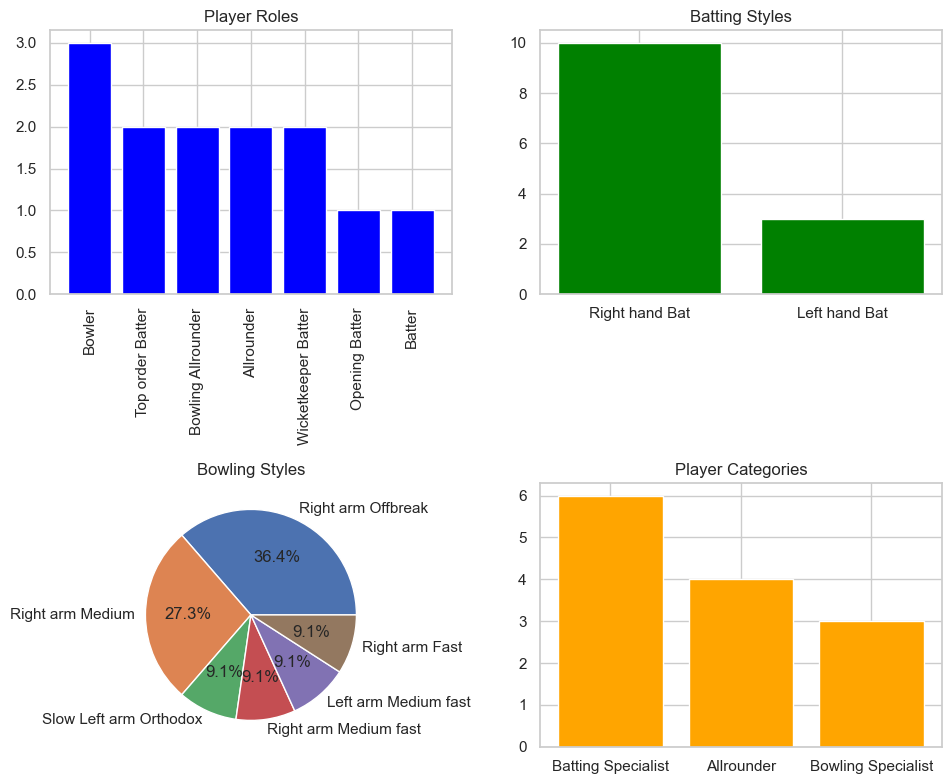

Total Players: 13
Players by Role: {'Bowler': 3, 'Top order Batter': 2, 'Bowling Allrounder': 2, 'Allrounder': 2, 'Wicketkeeper Batter': 2, 'Opening Batter': 1, 'Batter': 1}


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Create simplified DataFrame
data = [
    ["KL Rahul", "Right hand Bat", "", "Opening Batter"],
    ["Rohit Sharma", "Right hand Bat", "Right arm Offbreak", "Top order Batter"],
    ["Virat Kohli", "Right hand Bat", "Right arm Medium", "Top order Batter"],
    ["Suryakumar Yadav", "Right hand Bat", "Right arm Medium", "Batter"],
    ["Axar Patel", "Left hand Bat", "Slow Left arm Orthodox", "Bowling Allrounder"],
    ["Hardik Pandya", "Right hand Bat", "Right arm Medium fast", "Allrounder"],
    ["Dinesh Karthik", "Right hand Bat", "Right arm Offbreak", "Wicketkeeper Batter"],
    ["Ravichandran Ashwin", "Right hand Bat", "Right arm Offbreak", "Bowling Allrounder"],
    ["Bhuvneshwar Kumar", "Right hand Bat", "Right arm Medium", "Bowler"],
    ["Arshdeep Singh", "Left hand Bat", "Left arm Medium fast", "Bowler"],
    ["Mohammed Shami", "Right hand Bat", "Right arm Fast", "Bowler"],
    ["Rishabh Pant", "Left hand Bat", "", "Wicketkeeper Batter"],
    ["Deepak Hooda", "Right hand Bat", "Right arm Offbreak", "Allrounder"]
]

df = pd.DataFrame(data, columns=["name", "battingStyle", "bowlingStyle", "role"])

# Simple analysis and visualization in one function
def quick_analysis():
    # Create a 2x2 plot
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))
    
    # Role distribution (top left)
    role_counts = df['role'].value_counts()
    axs[0, 0].bar(role_counts.index, role_counts.values, color='blue')
    axs[0, 0].set_title('Player Roles')
    axs[0, 0].tick_params(axis='x', rotation=90)
    
    # Batting style (top right)
    bat_counts = df['battingStyle'].value_counts()
    axs[0, 1].bar(bat_counts.index, bat_counts.values, color='green')
    axs[0, 1].set_title('Batting Styles')
    
    # Bowling style pie (bottom left)
    bowl_counts = df[df['bowlingStyle'] != '']['bowlingStyle'].value_counts()
    axs[1, 0].pie(bowl_counts, labels=bowl_counts.index, autopct='%1.1f%%')
    axs[1, 0].set_title('Bowling Styles')
    
    # Player categories (bottom right)
    df['category'] = 'Bowling Specialist'  # Default
    df.loc[df['role'].str.contains('Batter|Wicketkeeper'), 'category'] = 'Batting Specialist'
    df.loc[df['role'].str.contains('Allrounder'), 'category'] = 'Allrounder'
    
    cat_counts = df['category'].value_counts()
    axs[1, 1].bar(cat_counts.index, cat_counts.values, color='orange')
    axs[1, 1].set_title('Player Categories')
    
    plt.tight_layout()
    plt.show()
    
    # Print basic stats
    print(f"Total Players: {len(df)}")
    print(f"Players by Role: {dict(role_counts)}")

# Run analysis
quick_analysis()

## IPL Cricket Analysis

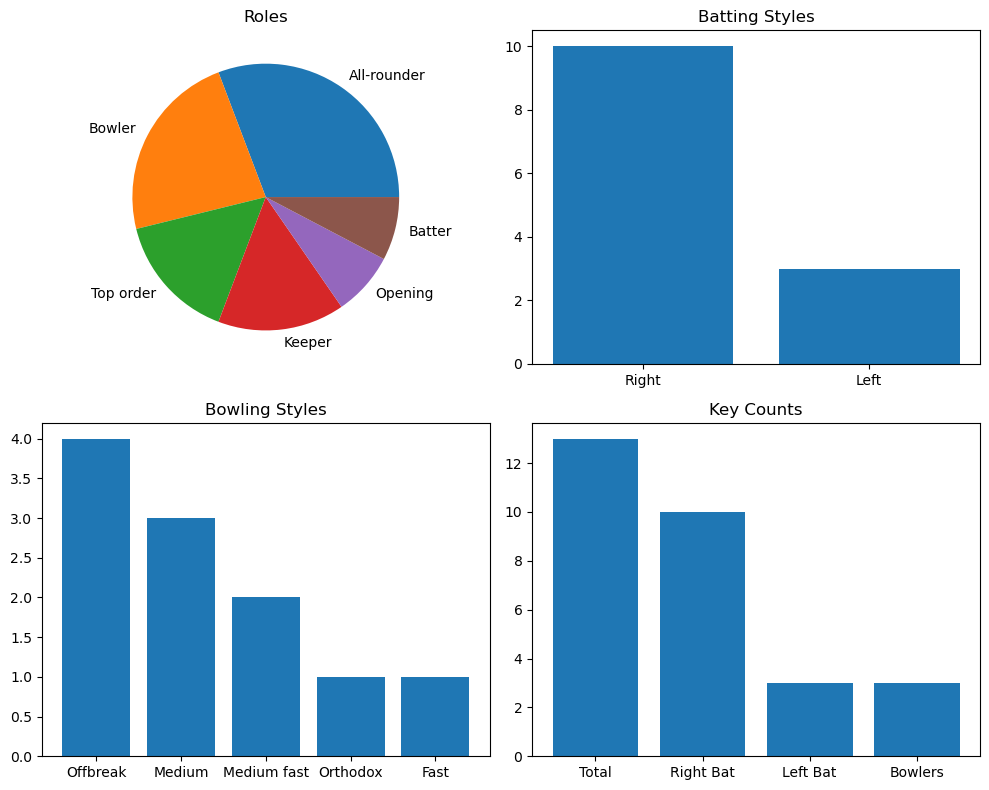

Team composition:
- Total players: 13
- Batters: 6
- Bowlers: 3
- All-rounders: 4


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Simple data
data = [
    ["Rahul", "Right", "", "Opening"],
    ["Rohit", "Right", "Offbreak", "Top order"],
    ["Kohli", "Right", "Medium", "Top order"],
    ["Surya", "Right", "Medium", "Batter"],
    ["Axar", "Left", "Orthodox", "All-rounder"],
    ["Hardik", "Right", "Medium fast", "All-rounder"],
    ["Karthik", "Right", "Offbreak", "Keeper"],
    ["Ashwin", "Right", "Offbreak", "All-rounder"],
    ["Kumar", "Right", "Medium", "Bowler"],
    ["Arshdeep", "Left", "Medium fast", "Bowler"],
    ["Shami", "Right", "Fast", "Bowler"],
    ["Pant", "Left", "", "Keeper"],
    ["Hooda", "Right", "Offbreak", "All-rounder"]
]

# Create DataFrame
df = pd.DataFrame(data, columns=["name", "bat", "bowl", "role"])

# Simple analysis without complex operations
def simple_analysis():
    # Create 2x2 subplots
    fig, ax = plt.subplots(2, 2, figsize=(10, 8))
    
    # Plot 1: Roles pie chart
    roles = df['role'].value_counts()
    ax[0,0].pie(roles, labels=roles.index)
    ax[0,0].set_title('Roles')
    
    # Plot 2: Batting styles
    bats = df['bat'].value_counts()
    ax[0,1].bar(bats.index, bats.values)
    ax[0,1].set_title('Batting Styles')
    
    # Plot 3: Bowling styles
    bowls = df[df['bowl'] != '']['bowl'].value_counts()
    ax[1,0].bar(bowls.index, bowls.values)
    ax[1,0].set_title('Bowling Styles')
    
    # Plot 4: Simple counts
    ax[1,1].bar(['Total', 'Right Bat', 'Left Bat', 'Bowlers'], 
                [len(df), 
                 len(df[df['bat'] == 'Right']), 
                 len(df[df['bat'] == 'Left']),
                 len(df[df['role'] == 'Bowler'])])
    ax[1,1].set_title('Key Counts')
    
    plt.tight_layout()
    plt.show()
    
    # Print summary
    print(f"Team composition:")
    print(f"- Total players: {len(df)}")
    print(f"- Batters: {len(df[df['role'].str.contains('Batter|Top|Opening|Keeper')])}")
    print(f"- Bowlers: {len(df[df['role'] == 'Bowler'])}")
    print(f"- All-rounders: {len(df[df['role'] == 'All-rounder'])}")

# Run analysis
simple_analysis()